In [56]:
import numpy as np
from scipy.stats import norm   #import gaussian cdf and pdf

In [57]:
# EVALUATE BS ..
def BS_norm_price(F, K, T, vol):
  sigma_sqrt_t = vol * np.sqrt(T)
  d1 = (F - K) / sigma_sqrt_t
  
  return (F-K) * norm.cdf(d1) + sigma_sqrt_t * norm.pdf(d1)
# ----------------------------------------------

In [58]:
size = 1000000    # sample size
T = np.random.randint(1,10,size)
K = np.random.random_sample(size) * 0.2 - 0.1; F = 0.01; vol = 0.01
X = np.matrix(np.vstack((K,T))).T

[[ 1.24493519e-02  8.00000000e+00]
 [-1.19209822e-02  1.00000000e+00]
 [ 4.93189793e-02  9.00000000e+00]
 ...
 [-1.40784348e-03  2.00000000e+00]
 [ 8.36288166e-02  6.00000000e+00]
 [-2.39634086e-02  2.00000000e+00]]


In [59]:
price = []
for i,j in zip(K,T):
    p = BS_norm_price(F,i,j,vol)
    price.append(p)

In [ ]:
X_train = X[:int(0.8*size)]; X_test = X[int(0.8*size):]
y_train = price[:int(0.8*size)]; y_test = price[int(0.8*size):]

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
model = Sequential()
model.add(Dense(256, activation='elu', input_dim=2))
model.add(Dense(128, activation='elu'))
model.add(Dense(64, activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(1, activation='elu'))

In [ ]:
sgd = keras.optimizers.RMSprop(lr=0.001)
model.compile(loss=keras.losses.mean_squared_error,
              optimizer=sgd,
              metrics=['mse'])  

In [ ]:
epochs = 35
batch_size = 128
# Fit the model weights.
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 800000 samples, validate on 200000 samples
Epoch 1/35
800000/800000 [==============================] - 25s 31us/step - loss: 2.9630e-04 - mean_squared_error: 2.9630e-04 - val_loss: 3.9516e-06 - val_mean_squared_error: 3.9516e-06
Epoch 2/35
800000/800000 [==============================] - 27s 34us/step - loss: 1.5852e-04 - mean_squared_error: 1.5852e-04 - val_loss: 3.7532e-06 - val_mean_squared_error: 3.7532e-06
Epoch 3/35
800000/800000 [==============================] - 29s 36us/step - loss: 1.3515e-04 - mean_squared_error: 1.3515e-04 - val_loss: 7.3808e-04 - val_mean_squared_error: 7.3808e-04
Epoch 4/35
800000/800000 [==============================] - 30s 38us/step - loss: 1.3192e-04 - mean_squared_error: 1.3192e-04 - val_loss: 6.5862e-05 - val_mean_squared_error: 6.5862e-05
Epoch 5/35
800000/800000 [==============================] - 28s 35us/step - loss: 1.1397e-04 - mean_squared_error: 1.1397e-04 - val_loss: 3.3127e-06 - val_mean_squared_error: 3.3127e-06
Epoch 6/35
800000/

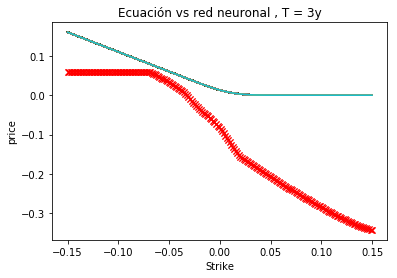

In [66]:
K_valid = np.linspace(-0.15, 0.15, 200); T = np.ones(len(K_valid))*3
X_validation = np.matrix(np.vstack((K_valid,T))).T

price_valid = []
for i in K_valid:
    p = BS_norm_price(F,i,T,vol)
    price_valid.append(p)
    
#X_valid = np.hstack((np.ones([len(K_valid),3])*[F,T,vol],np.matrix(K_valid).T))
price_predict = model.predict(X_validation)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(K_valid,price_valid);
plt.plot(K_valid,price_predict,'rx');
plt.plot(K_valid,price_valid, label = 'equation');
plt.plot(K_valid,price_predict,'rx', label = 'ANN');
plt.title('Ecuación vs red neuronal , T = 3y'); plt.ylabel('price'); plt.xlabel('Strike');